Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Dataset
df = pd.read_csv('train.csv')
df = df.drop('Id', axis = 1)
#df.info()

In [3]:
print(df['Ecology_2'].unique())
print(df['Ecology_3'].unique())
print(df['Shops_2'].unique())

['B' 'A']
['B' 'A']
['B' 'A']


In [4]:
# Dealing with the objects
mapping = {'A': 0, 'B': 1}
df_copy = df.replace({'Ecology_2': mapping, 'Ecology_3': mapping, 'Shops_2':mapping})
columns=df_copy.columns.tolist()
for c in columns:
    df_copy[c]=df_copy[c].astype(float)

In [5]:
data = df_copy

In [6]:
x = data[['DistrictId','Helthcare_2']]

In [7]:
x['DistrictId'].size

10000

In [8]:
# Scale
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
#x_scaled

In [9]:
# Clustering
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
#wcss

Text(0, 0.5, 'WCSS')

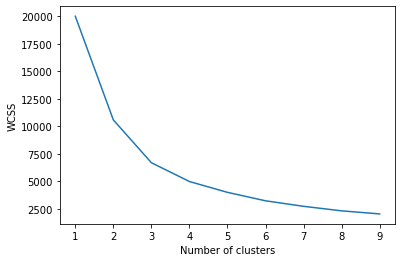

In [10]:
# Visualizing

plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

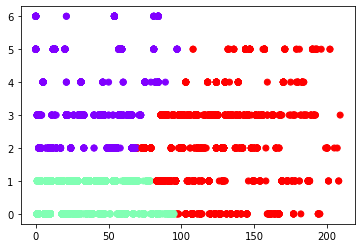

In [11]:
# Final clustering

kmeans_final = KMeans(3)
kmeans_final.fit(x_scaled)
clusters = x.copy()
clusters['cluster_pred'] = kmeans_final.predict(x_scaled)

#plot
plt.scatter(clusters['DistrictId'], clusters['Helthcare_2'],  c= clusters['cluster_pred'], cmap = 'rainbow')

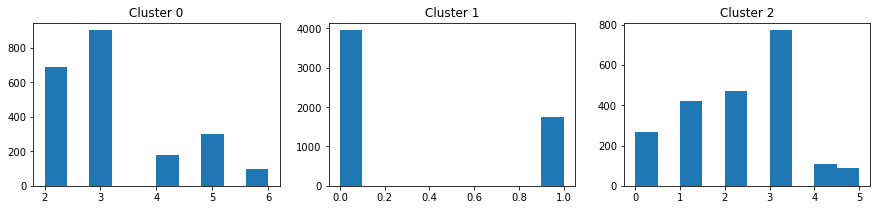

In [12]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize =(15,3))
ax1.hist(clusters.loc[clusters['cluster_pred']==0, 'Helthcare_2'])
ax1.set_title('Cluster 0')
ax2.hist(clusters.loc[clusters['cluster_pred']==1, 'Helthcare_2'])
ax2.set_title('Cluster 1')
ax3.hist(clusters.loc[clusters['cluster_pred']==2, 'Helthcare_2'])
ax3.set_title('Cluster 2')
#ax4.hist(clusters['Price'])
#ax4.set_title('All')

plt.show()

In [13]:
clusters_pred = clusters['cluster_pred']
data = data.assign(District_cluster=clusters_pred)

In [14]:
data['Healthcare_1'] = data.groupby('District_cluster').transform(lambda x: x.fillna(x.median()))

In [15]:
data['SquareTest'] = data['LifeSquare']/data['Square']

In [ ]:
data.describe(include = 'all')

In [39]:
test =data_test

In [17]:
q = 0.99
squares = ['Square', 'LifeSquare', 'KitchenSquare']
for i in squares:
    test=test[test[i]<data[i].quantile(q)]
    test=test[test[i]>data[i].quantile(1-q)]

In [40]:
test.loc[test['HouseYear'] > 2021, 'HouseYear'] = np.median(data['HouseYear'])
test.loc[test['HouseYear'] < 1900, 'HouseYear'] = np.median(data['HouseYear'])

In [41]:
columns_all = test.columns.tolist()
Columns_all = columns_all.remove('HouseYear')
Columns_all = columns_all.remove('Id')
for i in columns_all:
    test.loc[test[i]==test['HouseYear'],i] = data[i].median()

In [42]:
test.loc[test["LifeSquare"] - test['KitchenSquare'] < 0 ,'KitchenSquare_new'] = test["LifeSquare"]
test.loc[test["LifeSquare"] - test['KitchenSquare'] < 0 ,'LifeSquare_new'] = test["KitchenSquare"]
test.loc[test["LifeSquare_new"].isnull(),'LifeSquare_new'] = test["LifeSquare"]
test.loc[test["KitchenSquare_new"].isnull(),'KitchenSquare_new'] = test["KitchenSquare"]

In [43]:
columns = ['LifeSquare', 'KitchenSquare']
for i in columns:
    test = test.drop(i, axis = 1)
    test = test.rename(columns={i+'_new': i})

In [44]:
test.loc[test["Square"] - test['LifeSquare'] < 0 ,'LifeSquare_new'] = test["Square"]
test.loc[test["Square"] - test['LifeSquare'] < 0 ,'Square_new'] = test["LifeSquare"]
test.loc[test["LifeSquare_new"].isnull(),'LifeSquare_new'] = test["LifeSquare"]
test.loc[test["Square_new"].isnull(),'Square_new'] = test["Square"]

In [45]:
columns = ['Square', 'LifeSquare']
for i in columns:
    test = test.drop(i, axis = 1)
    test = test.rename(columns={i+'_new': i})

In [46]:
test.loc[test['Square']/test['LifeSquare']>3]

,Id,DistrictId,Rooms,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,District_cluster,KitchenSquare,LifeSquare,Square
17,6791.0,1.0,3.0,4.0,24.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,8.0,0.0,1.0,1.0,0,1.0,2.470856,72.023275
31,3340.0,27.0,3.0,9.0,17.0,1977.0,0.211401,1.0,1.0,9.0,1892.0,0.0,38.0,0.0,1.0,1.0,0,1.0,3.986053,69.921939
135,3798.0,30.0,2.0,4.0,1.0,1977.0,0.000078,1.0,1.0,22.0,6398.0,141.0,9.0,3.0,23.0,1.0,1,1.0,5.199864,39.187587
265,6428.0,9.0,1.0,3.0,1.0,1977.0,0.161532,1.0,1.0,25.0,5648.0,1.0,8.0,2.0,4.0,1.0,1,1.0,3.013166,43.037264
309,6150.0,6.0,3.0,17.0,17.0,1977.0,0.243205,1.0,1.0,5.0,1564.0,0.0,90.0,0.0,0.0,1.0,0,1.0,1.633542,76.379553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,1957.0,6.0,2.0,4.0,17.0,2019.0,0.243205,1.0,1.0,5.0,1564.0,0.0,62.0,0.0,0.0,1.0,0,1.0,5.230383,66.922721
4887,14015.0,6.0,2.0,15.0,17.0,1977.0,0.243205,1.0,1.0,5.0,1564.0,0.0,21.0,0.0,0.0,1.0,0,1.0,4.104411,65.743437
4913,7021.0,1.0,2.0,16.0,17.0,1977.0,0.007122,1.0,1.0,1.0,264.0,0.0,34.0,0.0,1.0,1.0,0,0.0,2.814241,65.607027
4938,12024.0,25.0,1.0,27.0,1.0,2013.0,0.069753,1.0,1.0,53.0,13670.0,4.0,27.0,1.0,11.0,1.0,0,1.0,4.259876,44.925461


In [47]:
test.loc[test["LifeSquare"].isnull(),'LifeSquare'] = test["Square"]*np.mean(data['SquareTest']) 
test.loc[test['Square']/test['LifeSquare']>2.5, 'LifeSquare'] = test["Square"]*np.mean(data['SquareTest']) 

In [50]:
data_test_new = test

In [29]:
data_new.to_excel('C:/Users/tkala/Downloads/data_new.xlsx', sheet_name='sheet1', index=False)

In [51]:
data_test_new.to_excel('C:/Users/tkala/Downloads/data_test_new.xlsx', sheet_name='sheet1', index=False)

In [ ]:
data_new.describe(include = 'all')

In [ ]:
# Check if the data makes sence

f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False, figsize =(15,3)) 
ax1.hist(data_new['HouseYear'])
ax1.set_title('HouseYear')
ax2.hist(data_new['Square'], bins = 20)
ax2.set_title('Square')
ax3.hist(data_new['LifeSquare'], bins = 20)
ax3.set_title('LifeSquare')
ax4.hist(data_new['KitchenSquare'], bins = 20)
ax4.set_title('KitchenSquare')


plt.show()


Test Dataset

In [30]:
#Dataset
df_test = pd.read_csv('test.csv')

#df_test.info()

In [31]:
# Dealing with the objects
mapping = {'A': 0, 'B': 1}
df_test_copy = df_test.replace({'Ecology_2': mapping, 'Ecology_3': mapping, 'Shops_2':mapping})
columns=df_test_copy.columns.tolist()
for c in columns:
    df_test_copy[c]=df_test_copy[c].astype(float)

In [32]:
data_test = df_test_copy

In [53]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5000 non-null   float64
 1   DistrictId         5000 non-null   float64
 2   Rooms              5000 non-null   float64
 3   Square             5000 non-null   float64
 4   LifeSquare         3959 non-null   float64
 5   KitchenSquare      5000 non-null   float64
 6   Floor              5000 non-null   float64
 7   HouseFloor         5000 non-null   float64
 8   HouseYear          5000 non-null   float64
 9   Ecology_1          5000 non-null   float64
 10  Ecology_2          5000 non-null   float64
 11  Ecology_3          5000 non-null   float64
 12  Social_1           5000 non-null   float64
 13  Social_2           5000 non-null   float64
 14  Social_3           5000 non-null   float64
 15  Healthcare_1       5000 non-null   float64
 16  Helthcare_2        5000 

In [33]:
x_test = data_test[['DistrictId', 'Helthcare_2']]

In [34]:
x_test_scaled = preprocessing.scale(x_test)

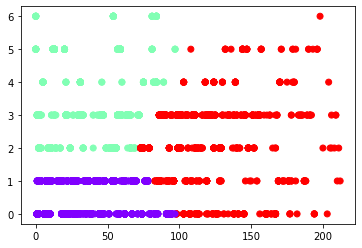

In [35]:
# Final clustering
model = KMeans(n_clusters=3) ## Kmeans model
train = model.fit(x_test_scaled) ## Fitting the training data

clusters_test = x_test.copy()
clusters_test['cluster_pred'] = model.predict(x_test_scaled)

#plot
plt.scatter(clusters_test['DistrictId'], clusters_test['Helthcare_2'],  c= clusters_test['cluster_pred'], cmap = 'rainbow')

In [36]:
clusters_pred_test= clusters_test['cluster_pred']
data_test = data_test.assign(District_cluster=clusters_pred_test)

In [37]:
data_test['Healthcare_1'] = data.groupby('District_cluster').transform(lambda x: x.fillna(data['Healthcare_1'].median()))

In [55]:
data_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5000 non-null   float64
 1   DistrictId        5000 non-null   float64
 2   Rooms             5000 non-null   float64
 3   Floor             5000 non-null   float64
 4   HouseFloor        5000 non-null   float64
 5   HouseYear         5000 non-null   float64
 6   Ecology_1         5000 non-null   float64
 7   Ecology_2         5000 non-null   float64
 8   Ecology_3         5000 non-null   float64
 9   Social_1          5000 non-null   float64
 10  Social_2          5000 non-null   float64
 11  Social_3          5000 non-null   float64
 12  Healthcare_1      5000 non-null   float64
 13  Helthcare_2       5000 non-null   float64
 14  Shops_1           5000 non-null   float64
 15  Shops_2           5000 non-null   float64
 16  District_cluster  5000 non-null   int32  


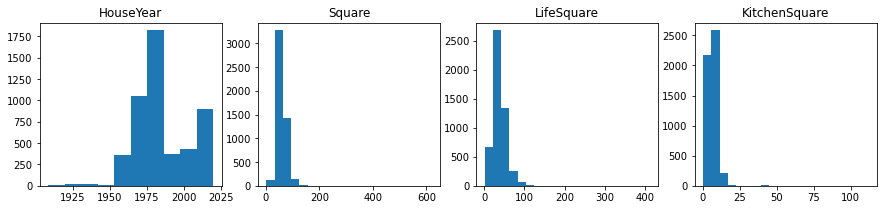

In [52]:
# Check if the data makes sence

f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False, figsize =(15,3)) 
ax1.hist(data_test_new['HouseYear'])
ax1.set_title('HouseYear')
ax2.hist(data_test_new['Square'], bins = 20)
ax2.set_title('Square')
ax3.hist(data_test_new['LifeSquare'], bins = 20)
ax3.set_title('LifeSquare')
ax4.hist(data_test_new['KitchenSquare'], bins = 20)
ax4.set_title('KitchenSquare')


plt.show()
